In [1]:
# xgboost according to kaggle is how you solve fashion mnist
# https://iryndin.dev/post/xgboost_fashion_mnist/
# https://github.com/anktplwl91/fashion_mnist/blob/master/fashion_xgboost.ipynb
# https://www.kaggle.com/subhayan2018/exploring-xgboost-with-fashion-mnist
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
%matplotlib inline

In [3]:
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
import mnist_reader
x_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [4]:
print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))
print(x_test.shape, type(x_train))
print(y_test.shape, type(y_train))

(60000, 784) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>
(10000,) <class 'numpy.ndarray'>


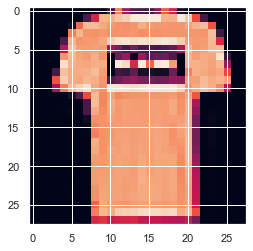

In [5]:
plt.imshow(x_train[1].reshape((28,28)))
plt.show()

In [6]:
# new smaller more managable sample set
x_train = x_train/255.0
x_test = x_test/255.0

In [27]:
# log regression on new sample set
from sklearn.linear_model import LogisticRegression
start = time.time()
logReg = LogisticRegression(max_iter=2000)
logReg.fit(x_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 147.9576280117035s


In [28]:
prediction_test  = logReg.predict(x_test)
prediction_train = logReg.predict(x_train)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [30]:
print(accuracy_score(y_train, prediction_train))

0.8810333333333333


In [31]:
print(accuracy_score(y_test, prediction_test))

0.8441


In [12]:
import xgboost as xgb

In [21]:
from xgboost import XGBClassifier
start = time.time()
xgb_clf = XGBClassifier(n_estimators=300, n_jobs=-1, seed=0)
xgb_clf.fit(x_train,y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")

[14:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>
Training time: 

In [22]:
y_pred = xgb_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9039


In [15]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, seed=0)
xgb_clf.fit(x_train,y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")

[10:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>
Training time: 903.4990

In [16]:
y_pred = xgb_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9053


In [17]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, gamma=2, seed=0)
xgb_clf.fit(x_train,y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")
y_pred = xgb_clf.predict(x_test)
print("test accuracy")
print(accuracy_score(y_test, y_pred))

[11:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>
Training time: 1098.362

In [18]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, max_deth= 5, min_child_weight= 1, seed=0)
xgb_clf.fit(x_train,y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")
y_pred = xgb_clf.predict(x_test)
print("test accuracy")
print(accuracy_score(y_test, y_pred))

[11:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_deth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_

In [19]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, max_deth= 5, min_child_weight= 1, seed=0)
xgb_clf.fit(x_train,y_train,eval_metric='mlogloss', early_stopping_rounds = 10, eval_set = [(x_test, y_test)])
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")
y_pred = xgb_clf.predict(x_test)
print("test accuracy")
print(accuracy_score(y_test, y_pred))

[11:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_deth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.02365
[1]	validation_0-mlogloss:0.79206
[2]	validation_0-mlogloss:0.65773
[3]	validation_0-mlogloss:0.57368
[4]	validation_0-mlogloss:0.51334
[5]	validation_0-mlogloss:0.47138
[6]	validation_0-mlogloss:0.44282
[7]	validation_0-mlogloss:0.41981
[8]	validation_0-mlogloss:0.40298
[9]	validation_0-mlogloss:0.39098
[10]	validation_0-mlogloss:0.37932
[11]	validation_0-mlogloss:0.37105
[12]	validation_0-mlogloss:0.36462
[13]	validation_0-mlogloss:0.35842
[14]	validation_0-mlogloss:0.35319
[15]	validation_0-mlogloss:0.34864
[16]	validation_0-mlogloss:0.34593
[17]	validation_0-mlogloss:

In [32]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, max_deth= 5, min_child_weight= 1, reg_lambda =20, seed=0)
xgb_clf.fit(x_train,y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")
y_pred = xgb_clf.predict(x_test)
print("test accuracy")
print(accuracy_score(y_test, y_pred))

C:\Users\conwa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[20:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_deth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric